Вариант 7:
\begin{align}
    \frac {\partial^2{u}} {\partial{x^2}} + \frac {\partial^2{u}} {\partial{y^2}} = -2u, \\
U(0, y) = cos(y), \\
U(\frac {\pi} {2}, y) = 0, \\
U(x, 0) = cos(x), \\
U(x, \frac {\pi} {2}) = 0
\end{align}

Аналитическое решение:
\begin{align}
U(x, y) = cos(x) \cdot cos(y)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def U0y(y: float):
    return np.cos(y)

def Ux0(x: float):
    return np.cos(x)

def Uly(y: float):
    return 0

def Uxl(x: float):
    return 0

def f(x:float, y:float):
    return 0

def Uans(x:float, y:float):
    return np.cos(x)*np.cos(y)

с = -2
startx = 0
starty = 0
finishx = np.pi / 2 
finishy = np.pi / 2 
kx = 20
ky = 20
hx = (finishx - startx) / (kx - 1)
hy = (finishy - starty) / (ky - 1)
xs = np.linspace(startx, finishx, kx)
ys = np.linspace(starty, finishy, ky)
xgrid, ygrid = np.meshgrid(xs, ys)
zans = np.zeros((kx, ky), dtype=np.float64)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        zans[i][j] = Uans(x,y)

In [3]:
answer_lib = np.zeros((kx, ky), dtype=np.float64)
cur_step = np.zeros((kx, ky), dtype=np.float64)

for i, y in enumerate(ys):
    cur_step[0][i] = U0y(y)
    cur_step[-1][i] = Uly(y)
for i, x in enumerate(xs):
    cur_step[i][0] = Ux0(x)
    cur_step[i][-1] = Uxl(x)

for i in range(1, kx - 1):
    coef = (cur_step[i][-1] - cur_step[i][0]) / (ys[-1] - ys[0])
    for j in range(1, ky - 1):
        cur_step[i][j] = cur_step[i][0] + coef*(ys[j] - ys[0])
        
next_step = np.array(cur_step, copy=True)

In [4]:
def get_error(cur_step, next_step):
    return np.max(np.abs(next_step - cur_step))

Conut iterations: 507


Text(0.5, 0, 'x')

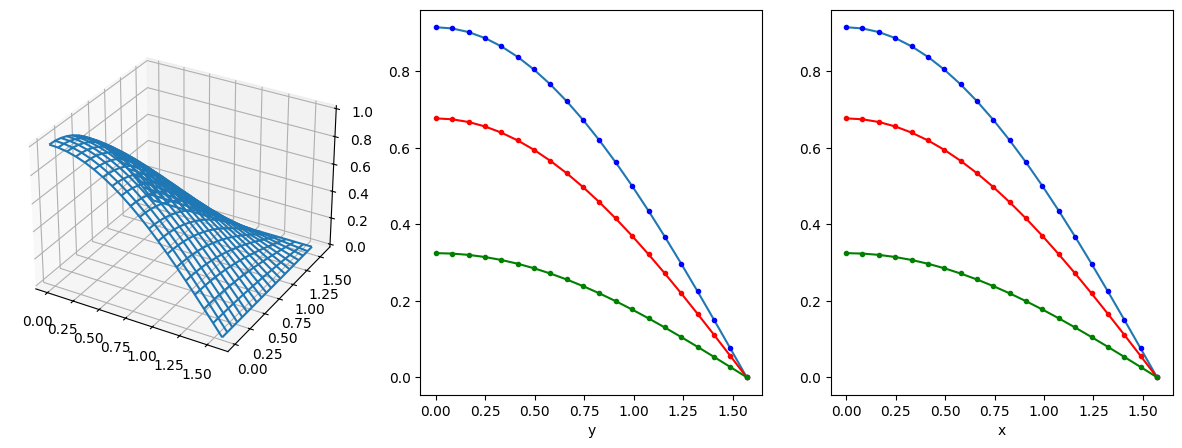

In [5]:
error = 1 * 10**(-5)
count = 0
while True:
    cur_step = np.array(next_step)
    for i in range(1, kx - 1):
        for j in range(1, ky - 1):
            next_step[i][j] = (
                hx**2 * cur_step[i+1][j]
                + hx**2 * cur_step[i-1][j]
                + hy**2 * cur_step[i][j+1]
                + hy**2 * cur_step[i][j-1]
                - f(xs[i], ys[j]) * hx**2 * hy**2
            ) / (2 * (hx**2 + hy**2) + hx**2 * hy**2 * с)
    count += 1
    if get_error(cur_step, next_step) < error:
        break
    
print("Conut iterations: {iterations}".format(iterations = count))
    
answer_lib = np.array(next_step)

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax_3d = fig.add_subplot(1,3,1, projection='3d')
ax_3d.plot_wireframe(xgrid, ygrid, answer_lib.transpose())
axx = fig.add_subplot(1,3,2)
axx.plot(ys, answer_lib[kx // 4])
axx.plot(ys, zans[kx // 4], '.b')
axx.plot(ys, answer_lib[kx // 4 * 2], 'r')
axx.plot(ys, zans[kx // 4 * 2], '.r')
axx.plot(ys, answer_lib[kx // 4 * 3], 'g')
axx.plot(ys, zans[kx // 4 * 3], '.g')
plt.xlabel('y')
axy = fig.add_subplot(1,3,3)
axy.plot(xs, answer_lib[:, ky // 4])
axy.plot(xs, zans[:, ky // 4], '.b')
axy.plot(xs, answer_lib[:, ky // 4 * 2], 'r')
axy.plot(xs, zans[:, ky // 4 * 2], '.r')
axy.plot(xs, answer_lib[:, ky // 4 * 3], 'g')
axy.plot(xs, zans[:, ky // 4 * 3], '.g')
plt.xlabel('x')

Text(0.5, 0, 'x')

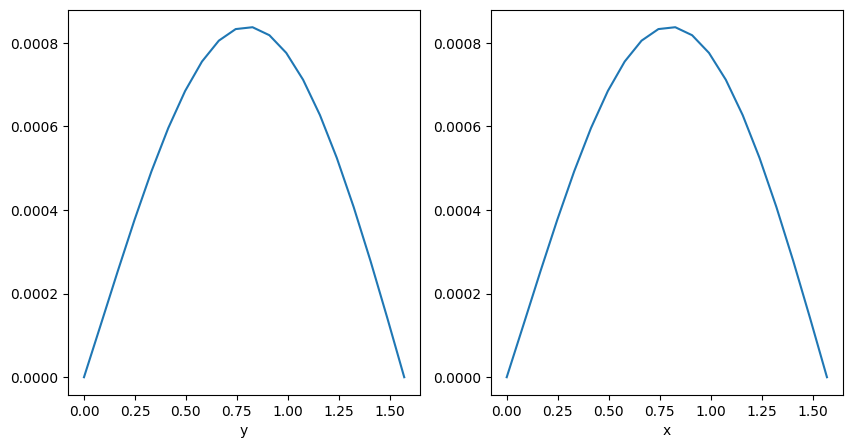

In [6]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot (1, 2, 1)
plt.plot(ys, np.max(np.abs(answer_lib - zans), axis=0))
plt.xlabel('y')
plt.subplot (1, 2, 2)
plt.plot(xs, np.max(np.abs(answer_lib - zans), axis=1))
plt.xlabel('x')

### Итерационный метод с релаксацией


In [7]:
answer_relax = np.zeros((kx, ky), dtype=np.float64)
relax_coef = 0.5
cur_step = np.zeros((kx, ky), dtype=np.float64)

for i, y in enumerate(ys):
    cur_step[0][i] = U0y(y)
    cur_step[-1][i] = Uly(y)
for i, x in enumerate(xs):
    cur_step[i][0] = Ux0(x)
    cur_step[i][-1] = Uxl(x)

for i in range(1, kx - 1):
    coef = (cur_step[i][-1] - cur_step[i][0]) / (ys[-1] - ys[0])
    for j in range(1, ky - 1):
        cur_step[i][j] = cur_step[i][0] + coef*(ys[j] - ys[0])
        
next_step = np.array(cur_step, copy=True)

Conut iterations: 1015


Text(0.5, 0, 'x')

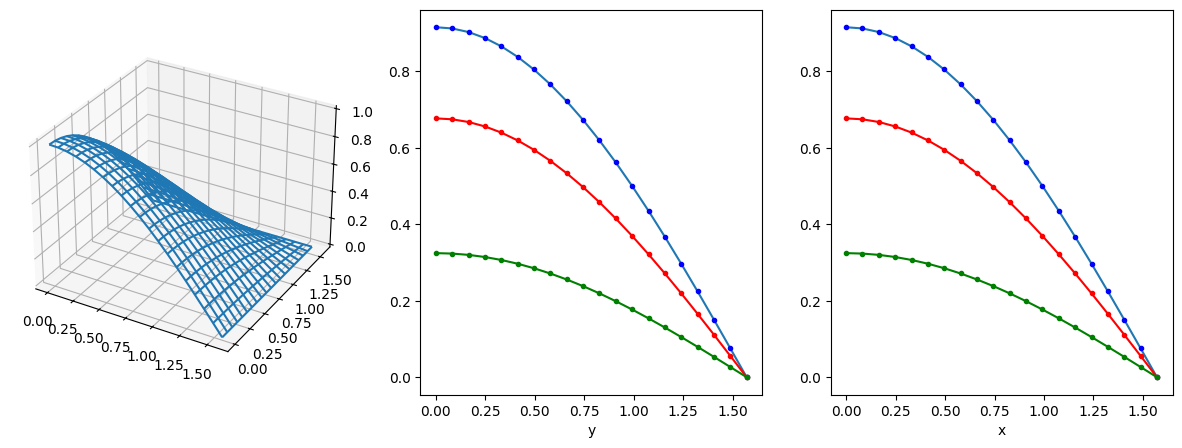

In [8]:
error = 1 * 10**(-5)
count = 0
while True:
    cur_step = np.array(next_step)*relax_coef + (1 - relax_coef)*cur_step
    for i in range(1, kx - 1):
        for j in range(1, ky - 1):
            next_step[i][j] = (
                hx**2 * cur_step[i+1][j]
                + hx**2 * cur_step[i-1][j]
                + hy**2 * cur_step[i][j+1]
                + hy**2 * cur_step[i][j-1]
                - f(xs[i], ys[j]) * hx**2 * hy**2
            ) / (2 * (hx**2 + hy**2) + hx**2 * hy**2 * с)
    count += 1
    if get_error(cur_step, next_step) < error:
        break

print("Conut iterations: {iterations}".format(iterations = count))

answer_relax = np.array(next_step)

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax_3d = fig.add_subplot(1,3,1, projection='3d')
ax_3d.plot_wireframe(xgrid, ygrid, answer_relax.transpose())
axx = fig.add_subplot(1,3,2)
axx.plot(ys, answer_relax[kx // 4])
axx.plot(ys, zans[kx // 4], '.b')
axx.plot(ys, answer_relax[kx // 4 * 2], 'r')
axx.plot(ys, zans[kx // 4 * 2], '.r')
axx.plot(ys, answer_relax[kx // 4 * 3], 'g')
axx.plot(ys, zans[kx // 4 * 3], '.g')
plt.xlabel('y')
axy = fig.add_subplot(1,3,3)
axy.plot(xs, answer_relax[:, ky // 4])
axy.plot(xs, zans[:, ky // 4], '.b')
axy.plot(xs, answer_relax[:, ky // 4 * 2], 'r')
axy.plot(xs, zans[:, ky // 4 * 2], '.r')
axy.plot(xs, answer_relax[:, ky // 4 * 3], 'g')
axy.plot(xs, zans[:, ky // 4 * 3], '.g')
plt.xlabel('x')

Text(0.5, 0, 'x')

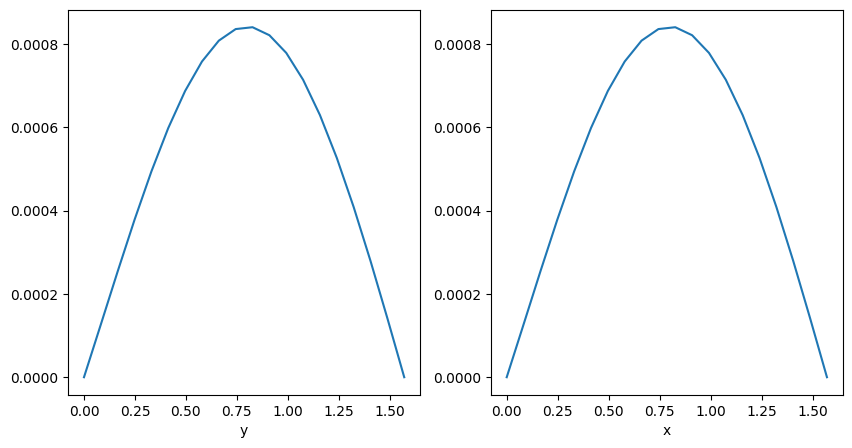

In [9]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot (1, 2, 1)
plt.plot(ys, np.max(np.abs(answer_relax - zans), axis=0))
plt.xlabel('y')
plt.subplot (1, 2, 2)
plt.plot(xs, np.max(np.abs(answer_relax - zans), axis=1))
plt.xlabel('x')

### Метод Зейделя


In [10]:
answer_zeydel = np.zeros((kx, ky), dtype=np.float64)
cur_step = np.zeros((kx, ky), dtype=np.float64)

for i, y in enumerate(ys):
    cur_step[0][i] = U0y(y)
    cur_step[-1][i] = Uly(y)
for i, x in enumerate(xs):
    cur_step[i][0] = Ux0(x)
    cur_step[i][-1] = Uxl(x)

for i in range(1, kx - 1):
    coef = (cur_step[i][-1] - cur_step[i][0]) / (ys[-1] - ys[0])
    for j in range(1, ky - 1):
        cur_step[i][j] = cur_step[i][0] + coef*(ys[j] - ys[0])
        
next_step = np.array(cur_step, copy=True)

Conut iterations: 285


Text(0.5, 0, 'x')

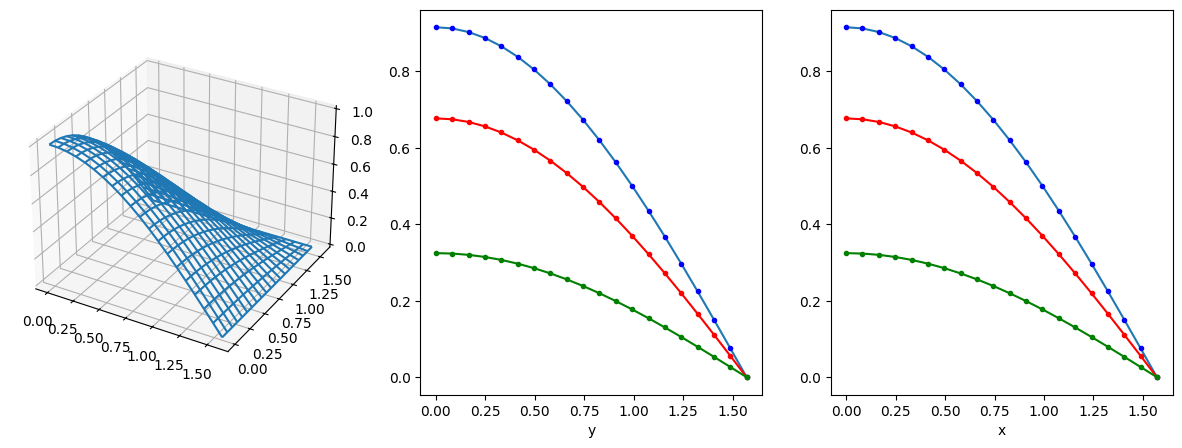

In [11]:
error = 1 * 10**(-5)
count = 0
while True:
    cur_step = np.array(next_step)
    for i in range(1, kx - 1):
        for j in range(1, ky - 1):
            next_step[i][j] = (
                hx**2 * cur_step[i+1][j]
                + hx**2 * next_step[i-1][j]
                + hy**2 * cur_step[i][j+1]
                + hy**2 * next_step[i][j-1]
                - f(xs[i], ys[j]) * hx**2 * hy**2
            ) / (2 * (hx**2 + hy**2) + hx**2 * hy**2 * с)
    count += 1
    if get_error(cur_step, next_step) < error:
        break

print("Conut iterations: {iterations}".format(iterations = count))

answer_zeydel = np.array(next_step)

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax_3d = fig.add_subplot(1,3,1, projection='3d')
ax_3d.plot_wireframe(xgrid, ygrid, answer_zeydel.transpose())
axx = fig.add_subplot(1,3,2)
axx.plot(ys, answer_zeydel[kx // 4])
axx.plot(ys, zans[kx // 4], '.b')
axx.plot(ys, answer_zeydel[kx // 4 * 2], 'r')
axx.plot(ys, zans[kx // 4 * 2], '.r')
axx.plot(ys, answer_zeydel[kx // 4 * 3], 'g')
axx.plot(ys, zans[kx // 4 * 3], '.g')
plt.xlabel('y')
axy = fig.add_subplot(1,3,3)
axy.plot(xs, answer_zeydel[:, ky // 4])
axy.plot(xs, zans[:, ky // 4], '.b')
axy.plot(xs, answer_zeydel[:, ky // 4 * 2], 'r')
axy.plot(xs, zans[:, ky // 4 * 2], '.r')
axy.plot(xs, answer_zeydel[:, ky // 4 * 3], 'g')
axy.plot(xs, zans[:, ky // 4 * 3], '.g')
plt.xlabel('x')

Text(0.5, 0, 'x')

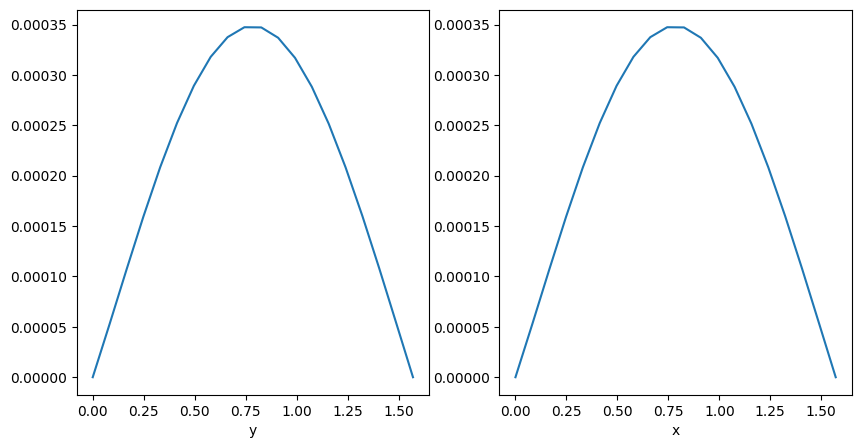

In [12]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot (1, 2, 1)
plt.plot(ys, np.max(np.abs(answer_zeydel - zans), axis=0))
plt.xlabel('y')
plt.subplot (1, 2, 2)
plt.plot(xs, np.max(np.abs(answer_zeydel - zans), axis=1))
plt.xlabel('x')